In [26]:
## Question: could jWST really see a bumblebee on the Moon?
%matplotlib inline
from astropy.analytic_functions import blackbody_nu
from astropy import units as u
from astropy.constants import c,h
import numpy as np
from matplotlib import pyplot as plt

## properties of bumblebee according to 
## http://www.bumblebee.org/bodyTempReg.htm (temperature) and Wikipedia (size)
## Note: bumblebee = BB = blackbody! ;-)
BB_area = 20 * u.mm * 10 * u.mm
BB_temp = 30 * u.Celsius
dist_moon = 380000*u.km
dist_sun = 150e6*u.km
BB_dist = dist_moon ## bumblebee at the moon
wave_obs = 10*u.micron

## estimarted reflectance at 10 micron of basalt and anorthosite according to
## http://www.sciencedirect.com/science/article/pii/S0032063303000175?via%3Dihub
reflectivity_moon_mid_ir = 0.001

In [2]:
BB_solid_angle = u.sr * BB_area / BB_dist**2

##
## radiance of the bumblebee
BB_nu = blackbody_nu(c/wave_obs, BB_temp)

##
## convert to flux at Earth's distance to moon (JWST's distance to the moon is variable)
F_BB = BB_nu * 4*np.pi * 1/2 * BB_solid_angle
F_BB.to("Jy")

<Quantity 3.0292670904507793e-06 Jy>

In [3]:
##
## But what is its SNR if the bumblebee were in front of the fully lit moon?
##
D_JWST = 6.5 * u.m
PSF_JWST = 1.22 * wave_obs / D_JWST

##
## radiance of the sun
T_sun = 5772 * u.K
BB_nu_sun = blackbody_nu(c/wave_obs, T_sun)

##
## area subtended by JWST PSF on the moon
A_moon = (PSF_JWST * dist_moon/2)**2 * np.pi

##
## flux of the footprint of the moon under JWST PSF
F_moon=BB_nu_sun * reflectivity_moon_mid_ir * A_moon/dist_sun**2 * 2*np.pi*u.sr
F_moon.to("Jy")

<Quantity 0.015657960427087933 Jy>

In [21]:
# 1 Jy = 1e-26 W/(Hz m**2)
## number of photons from moon per second
n_ph_moon = (F_moon*c/(wave_obs)*(D_JWST/2)**2*np.pi/(h*c/wave_obs)).to("Hz")
n_ph_BB = (F_BB*c/(wave_obs)*(D_JWST/2)**2*np.pi/(h*c/wave_obs)).to("Hz")
##
## let's assume we integrate 1e4 seconds. We then have
N_ph_moon = 1e4*u.s*n_ph_moon
N_ph_BB = 1e4*u.s*n_ph_BB
## we can now treat the bumble bee as source radiation and the photon shot noise of the moon's
## radiation as noise and arrive at a SNR of
SNR = N_ph_BB/np.sqrt(N_ph_BB)
SNR.to(1)

<Quantity 3894.9248709270855>

/usr/local/lib/python3.6/site-packages/astropy/units/quantity.py:951: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)


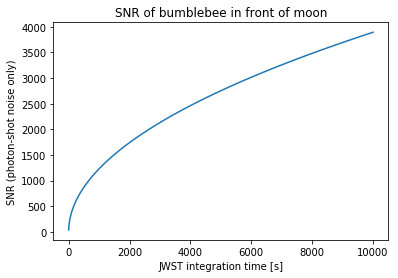

In [30]:
def SNR_BB(exptime,n_ph_moon,n_ph_BB):
    N_ph_moon = exptime*n_ph_moon
    N_ph_BB = exptime*n_ph_BB
    SNR = N_ph_BB/np.sqrt(N_ph_BB)
    return(SNR)

## We can also see how long we need to integrate (assuming we're already in the photon shot-noise limit) in order to see the bumblebee at a certain SNR
exptimes=np.arange(1e4)*u.s
plt.plot(exptimes,SNR_BB(exptimes,n_ph_moon,n_ph_BB))
plt.xlabel("JWST integration time [s]")
plt.ylabel("SNR (photon-shot noise only)")
plt.title("SNR of bumblebee in front of moon")